In [1]:
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')
#pd.reset_option('display.max_columns')

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV, RFE, SelectFromModel, SelectKBest, chi2
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesRegressor, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from lightgbm import LGBMClassifier

#import shap

### Data ensembling

In [2]:
descriptor_df = pd.read_excel('dummy.xlsx', None)
all_ligand_descriptors = []
for key in descriptor_df.keys():
    all_ligand_descriptors.append(descriptor_df[key])
descriptors_concatenated = pd.concat(all_ligand_descriptors,axis=0,ignore_index=True)

In [3]:
dummy_df = descriptors_concatenated
dummy_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
dummy_df.index

RangeIndex(start=0, stop=128, step=1)

In [83]:
dummy_df

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW07
0,39_SD-027,16.401355,0,0,2.351515,1.311378,3.989248,179.986399,12,0,...,0.040427,0.040362,0.023865,0.009515,0.014640,0.009574,0.007217,0.007414,0.857143,5.476464
1,24_SD-012,23.120752,0,0,2.500037,1.268694,4.211544,399.710054,15,0,...,0.057870,0.043320,0.020339,0.021463,0.016440,0.015736,0.007567,0.008254,0.875000,4.844187
2,102_wo17590_77,20.413286,0,0,2.492661,1.325716,4.191583,287.535995,15,0,...,0.042683,0.038943,0.022384,0.016187,0.013562,0.009500,0.007563,0.006001,1.000000,5.820083
3,1_BMS986165_PKD_TYK2_prw_nowater_nimbus01,25.569882,0,2,2.508615,1.302522,4.672306,347.548331,15,0,...,0.064072,0.032650,0.025123,0.018196,0.013125,0.011765,0.008158,0.007484,1.000000,6.137727
4,60_wo14660_81,21.489002,0,0,2.400952,1.280712,4.558538,234.554215,18,0,...,0.045058,0.035444,0.024929,0.018265,0.015278,0.010906,0.007188,0.007836,0.857143,0.000000
5,30_SD-018,21.339172,0,0,2.472600,1.317312,4.225541,471.185768,21,0,...,0.038856,0.037442,0.025802,0.016257,0.013335,0.011197,0.008125,0.005204,0.857143,4.727388
6,71_wo14670_11,22.432916,0,0,2.420100,1.256959,4.625576,273.079728,18,0,...,0.051389,0.036176,0.027947,0.020311,0.017482,0.011577,0.008103,0.008626,0.857143,0.000000
7,95_wo15310_41,26.139090,0,0,2.443295,1.302684,5.013631,367.330369,17,0,...,0.047956,0.032438,0.023939,0.017346,0.012051,0.010637,0.007354,0.006752,0.888889,5.820083
8,8_BMS986165_PKD_TYK2_prw_nowaternimbus08,27.800593,0,2,2.507478,1.293188,4.688683,474.489450,21,0,...,0.059557,0.034931,0.026020,0.017805,0.013921,0.011978,0.008577,0.008724,1.000000,5.416100
9,75_wo14670_1,20.978262,0,0,2.425675,1.257186,4.739769,172.528885,12,0,...,0.049769,0.039180,0.025959,0.020806,0.015533,0.014754,0.009087,0.008655,0.833333,5.416100


In [7]:
all_ligands = dummy_df.loc[0:63,:]
dummy_df =  dummy_df.loc[0:63,:]

In [ ]:
#all_ligands_ic50 = pd.DataFrame(all_ligands, columns=['Ligand'])
#all_ligands_ic50.to_excel("/home/alexis/Desktop/PeleAI_data/y_data_all_lignads.xlsx")

In [ ]:
dummy_df = dummy_df.loc[0:63,:]

In [84]:
lig = pd.DataFrame(dummy_df, columns=['Ligand'])
lig.to_excel("/home/alexis/Desktop/PeleAI_data/y_data.xlsx")
lig

FileCreateError: [Errno 2] No such file or directory: '/home/vant/data/PeleAI_data/ligands_list.xlsx'

#### Non-applying descriptors search

Search for those descriptors that could not be computed by _Modrded_ and discard them.

In [5]:
non_applying_descriptors = []
num_descriptors = len(dummy_df.columns)

for i in range(1, num_descriptors):
    if (str(dummy_df.dtypes[i]) != 'float64') and (str(dummy_df.dtypes[i]) != 'int64') and (str(dummy_df.dtypes[i]) != 'bool'):
        non_applying_descriptors.append(dummy_df.columns[i])
        

In [6]:
for descriptor in non_applying_descriptors:
    dummy_df.drop(columns=[descriptor], inplace=True)

#### _BMS_ and _wo_ ligands dropping

We decided to discard this two groups of ligads as they come from two alternative sources. 
We keep on working with _SD_ and _LAS_.

In [7]:
for index, row in dummy_df.iterrows():
    if 'BMS' in row['Ligand']:
        dummy_df.drop(index, inplace=True)

for index, row in dummy_df.iterrows():
    if 'wo' in row['Ligand']:
        dummy_df.drop(index, inplace=True)
        
for index, row in dummy_df.iterrows():
    if '30_' in row['Ligand']:
        dummy_df.drop(index, inplace=True)

In [8]:
dummy_df.reset_index(drop=True, inplace=True)
dummy_df['Ligand']

0        39_SD-027
1        24_SD-012
2        29_SD-017
3        33_SD-021
4        17_SD-002
5        36_SD-024
6        18_SD-003
7        25_SD-013
8        23_SD-011
9     12_LAS203756
10       34_SD-022
11       28_SD-016
12       26_SD-014
13       37_SD-025
14    13_LAS203888
15       21_SD-009
16       19_SD-006
17       22_SD-010
18       35_SD-023
19       38_SD-026
20       32_SD-020
21    15_LAS203932
22       31_SD-019
23    16_LAS203965
24    14_LAS203900
25       27_SD-015
26       20_SD-008
27       39_SD-027
28       24_SD-012
29       29_SD-017
30       33_SD-021
31       17_SD-002
32       36_SD-024
33       18_SD-003
34       25_SD-013
35       23_SD-011
36    12_LAS203756
37       34_SD-022
38       28_SD-016
39       26_SD-014
40       37_SD-025
41    13_LAS203888
42       21_SD-009
43       19_SD-006
44       22_SD-010
45       35_SD-023
46       38_SD-026
47       32_SD-020
48    15_LAS203932
49       31_SD-019
50    16_LAS203965
51    14_LAS203900
52       27_

In [9]:
dummy_df =  dummy_df.loc[0:26,:]

In [10]:
dummy_df.sort_values(by=['Ligand'], inplace=True)
dummy_df.reset_index(drop=True, inplace=True)
dummy_df.head(64)

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12_LAS203756,24.793826,18.444754,0,0,41.003700,2.499482,4.946810,41.003700,1.322700,...,10.454812,81.186093,423.150681,8.463014,2776,52,170,204,8.472222,6.694444
1,13_LAS203888,17.953468,15.053156,0,0,28.680180,2.481106,4.871045,28.680180,1.246964,...,10.089178,71.498752,310.154209,7.564737,1182,36,122,144,8.250000,5.027778
2,14_LAS203900,24.017769,17.838004,0,1,39.902350,2.489954,4.913111,39.902350,1.330078,...,10.391116,79.976698,406.160518,8.123210,2558,49,164,196,7.611111,6.500000
3,15_LAS203932,23.529442,19.100026,0,0,38.633155,2.438811,4.855461,38.633155,1.287772,...,10.333222,85.157707,408.165837,8.163317,2496,47,160,190,9.722222,6.583333
4,16_LAS203965,21.896449,17.252001,0,0,36.699679,2.550926,4.945786,36.699679,1.310703,...,10.312712,79.570682,379.175673,7.738279,2170,45,150,180,8.611111,6.250000
5,17_SD-002,20.810405,17.428974,0,0,33.953149,2.411799,4.814987,33.953149,1.257524,...,10.201701,80.526405,391.084745,9.311542,1875,43,140,165,9.861111,6.000000
6,18_SD-003,20.632065,17.202330,0,0,34.866857,2.403846,4.795748,34.866857,1.291365,...,10.147179,80.381982,368.148455,7.832946,1897,42,138,162,9.250000,6.138889
7,19_SD-006,20.046279,15.451754,0,0,33.468199,2.366458,4.717857,33.468199,1.287238,...,9.964442,74.088365,352.176007,7.656000,1954,36,132,151,8.388889,5.805556
8,20_SD-008,23.460493,18.668293,0,0,39.626117,2.411196,4.822392,39.626117,1.278262,...,10.265593,66.616922,420.134617,8.752805,2826,50,156,182,10.861111,7.138889
9,21_SD-009,21.408122,17.992734,0,0,35.628419,2.415928,4.824665,35.628419,1.272444,...,10.229946,81.665307,403.104732,8.763146,2062,45,144,170,10.111111,6.333333


#### pIC50 values loading

In [11]:
pic50_raw = pd.read_excel('/home/alexis/Desktop/PeleAI_data/y_data.xlsx')

In [12]:
pic50_raw['Ligand']

0     12_LAS203756
1     13_LAS203888
2     14_LAS203900
3     15_LAS203932
4     16_LAS203965
5        17_SD-002
6        18_SD-003
7        19_SD-006
8        20_SD-008
9        21_SD-009
10       22_SD-010
11       23_SD-011
12       24_SD-012
13       25_SD-013
14       26_SD-014
15       27_SD-015
16       28_SD-016
17       29_SD-017
18       31_SD-019
19       32_SD-020
20       33_SD-021
21       34_SD-022
22       35_SD-023
23       36_SD-024
24       37_SD-025
25       38_SD-026
26       39_SD-027
Name: Ligand, dtype: object

### Descriptor curation

#### Correlation matrix and high correlated descriptors dropping

Computing of the correlation matrix, plotted below, of the ~1500 descriptors computed. Those descriptors that show a correlation coefficient above 0.8 will be discarded.

In [13]:
correlated_features = set()
correlation_matrix = dummy_df.drop('Ligand', axis=1).corr()

In [14]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8 and correlation_matrix.columns[j] not in correlated_features:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

set(['MATS3v', 'n12FaRing', 'MATS3s', 'MATS3p', 'SpAD_Dzare', 'MATS3d', 'Xch-3dv', 'MATS3c', 'AATS6Z', 'MATS4Z', 'MATS3m', 'MATS3i', 'AATS6m', 'MATS2se', 'LogEE_Dzpe', 'SdsN', 'MATS4d', 'AATS6d', 'MATS4i', 'SpMAD_D', 'MATS3Z', 'nFHRing', 'MATS4m', 'MATS4s', 'AATSC7m', 'MATS4v', 'AXp-6d', 'TopoPSA(NO)', 'AATS6v', 'AATS6p', 'AATS6s', 'ATS7Z', 'AATS4pe', 'Xp-5d', 'AETA_eta_R', 'TIC1', 'FPSA5', 'AATSC7i', 'FPSA3', 'FPSA2', 'FPSA1', 'nBondsS', 'AATS7se', 'MATS6are', 'SsssN', 'nAtom', 'TIC4', 'SpAbs_Dzpe', 'GATS2se', 'AETA_eta_L', 'AATSC6pe', 'ATS5se', 'MATS3pe', 'NssssC', 'RASA', 'ATS7s', 'ATS7p', 'ATS7v', 'n5AHRing', 'VE2_D', 'JGT10', 'WNSA2', 'ATS7i', 'WNSA4', 'VR3_Dzpe', 'ATS7m', 'Xpc-6d', 'BIC1', 'Spe', 'ATS7d', 'Xc-5dv', 'VR3_Dzare', 'SsCH3', 'Mor01se', 'Vabc', 'SpDiam_DzZ', 'ATS0pe', 'SaaNH', 'BCUTm-1l', 'BCUTm-1h', 'LogEE_A', 'LogEE_D', 'SpDiam_Dzv', 'SpDiam_Dzp', 'n9FaRing', 'MATS1se', 'AXp-5d', 'n4HRing', 'BIC4', 'AETA_beta_ns_d', 'SpDiam_Dzm', 'StsC', 'NaaO', 'SpDiam_Dzi', 'MATS4c

In [15]:
len(dummy_df.columns)

1503

In [16]:
print("Correlated descriptors computed: {}".format(len(correlated_features)))
print("Number of descriptors before discard: {}".format(len(dummy_df.columns)))
dummy_df = dummy_df.drop(correlated_features, axis=1)
print("Number of descriptors after discard: {}".format(len(dummy_df.columns)))

Correlated descriptors computed: 1012
Number of descriptors before discard: 1503
Number of descriptors after discard: 491


#### Correlation matrix

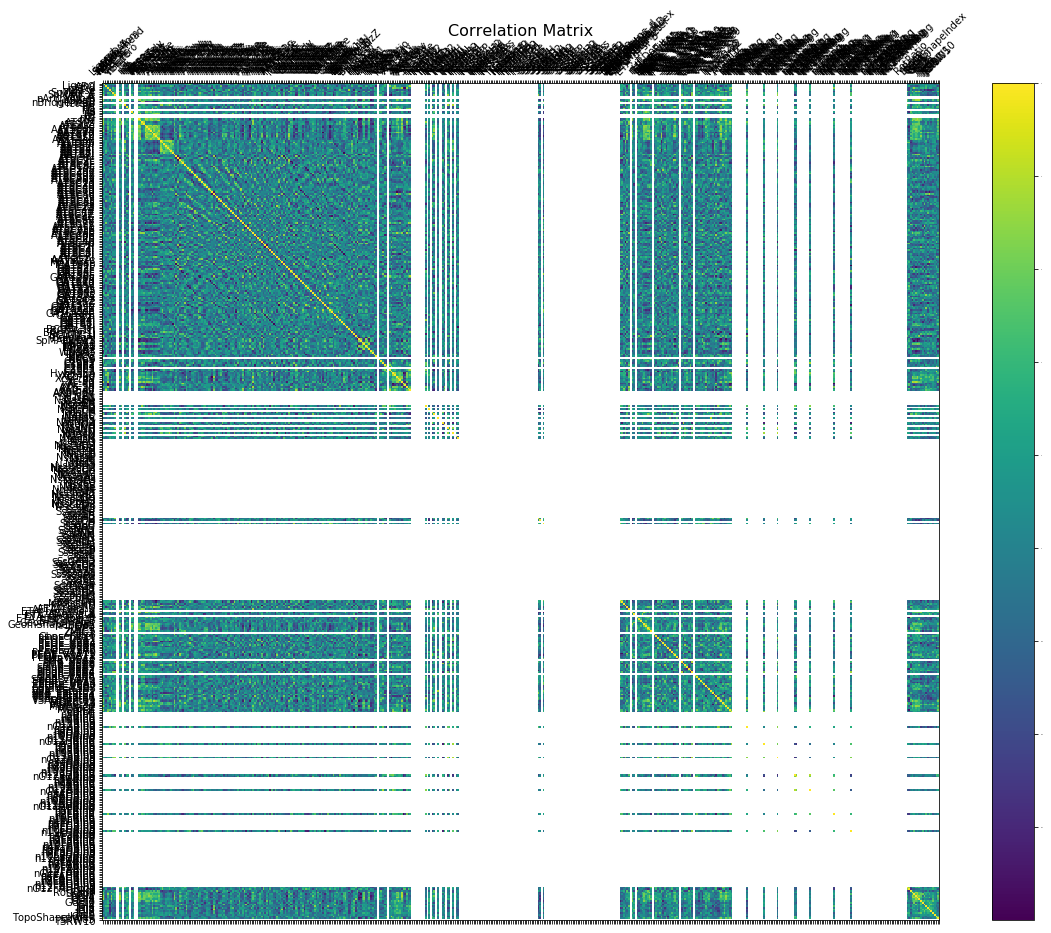

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dummy_df.corr(), fignum=f.number)
plt.xticks(range(dummy_df.shape[1]), dummy_df.columns, fontsize=10, rotation=45)
plt.yticks(range(dummy_df.shape[1]), dummy_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=1)
plt.title('Correlation Matrix', fontsize=16);

### Data splitting

In [18]:
dummy_df = dummy_df.merge(pic50_raw, how='left')

In [19]:
dummy_df.head()

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,TSRW10,IC50
0,12_LAS203756,24.793826,0,0,2.499482,1.322700,4.440538,597.574331,18,0,...,0.028958,0.017766,0.015289,0.008381,0.006972,0.006926,0.875,2.397895,81.186093,-4.824
1,13_LAS203888,17.953468,0,0,2.481106,1.246964,3.925606,230.400001,15,0,...,0.033704,0.018925,0.013818,0.014253,0.012246,0.004115,1.000,2.397895,71.498752,-10.292
2,14_LAS203900,24.017769,0,1,2.489954,1.330078,4.496545,499.352788,21,0,...,0.016311,0.018386,0.012110,0.005810,0.006563,0.004835,0.875,2.397895,79.976698,-7.284
3,15_LAS203932,23.529442,0,0,2.438811,1.287772,4.888546,227.217438,17,0,...,0.025721,0.017908,0.013517,0.010860,0.008173,0.008159,1.000,3.931826,85.157707,-11.456
4,16_LAS203965,21.896449,0,0,2.550926,1.310703,4.089075,1640.002566,18,0,...,0.025306,0.017225,0.012408,0.009386,0.009661,0.006200,0.875,3.044522,79.570682,-7.259


In [24]:
train, test = train_test_split(dummy_df, test_size=0.24)

In [25]:
test

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,TSRW10,IC50
5,17_SD-002,20.810405,0,0,2.411799,1.257524,4.763671,169.907127,12,0,...,0.030293,0.017606,0.016470,0.009910,0.009087,0.008048,1.000000,3.713572,80.526405,-8.337
6,18_SD-003,20.632065,0,0,2.403846,1.291365,4.680105,186.452688,12,0,...,0.028882,0.016961,0.013696,0.009962,0.008996,0.007448,1.000000,3.713572,80.381982,-9.284
15,27_SD-015,27.512863,0,0,2.492887,1.336666,4.823638,530.661007,21,0,...,0.021442,0.017890,0.010635,0.008011,0.007116,0.005979,1.000000,2.397895,85.660541,-6.509
3,15_LAS203932,23.529442,0,0,2.438811,1.287772,4.888546,227.217438,17,0,...,0.025721,0.017908,0.013517,0.010860,0.008173,0.008159,1.000000,3.931826,85.157707,-11.456
10,22_SD-010,24.288920,0,1,2.367520,1.301283,4.747259,419.620993,17,0,...,0.025965,0.015395,0.010213,0.007749,0.007639,0.006485,0.900000,2.397895,80.035639,-8.721
1,13_LAS203888,17.953468,0,0,2.481106,1.246964,3.925606,230.400001,15,0,...,0.033704,0.018925,0.013818,0.014253,0.012246,0.004115,1.000000,2.397895,71.498752,-10.292
26,39_SD-027,16.401355,0,0,2.351515,1.311378,3.989248,179.986399,12,0,...,0.023865,0.009515,0.014640,0.009574,0.007217,0.007414,0.857143,3.713572,72.950827,-4.824


In [26]:
train

,Ligand,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,TSRW10,IC50
2,14_LAS203900,24.017769,0,1,2.489954,1.330078,4.496545,499.352788,21,0,...,0.016311,0.018386,0.012110,0.005810,0.006563,0.004835,0.875000,2.397895,79.976698,-7.284
11,23_SD-011,21.679272,0,0,2.366948,1.253763,4.624579,283.956052,17,0,...,0.029689,0.016776,0.014010,0.008412,0.009403,0.008081,0.888889,2.397895,76.413702,-7.854
8,20_SD-008,23.460493,0,0,2.411196,1.278262,4.757935,316.952145,18,0,...,0.027293,0.017415,0.015467,0.009770,0.008872,0.007778,0.875000,0.000000,66.616922,-9.420
7,19_SD-006,20.046279,0,0,2.366458,1.287238,4.561329,210.869853,17,0,...,0.028020,0.018295,0.011736,0.009113,0.008393,0.009068,1.000000,2.397895,74.088365,-8.194
20,33_SD-021,25.622253,0,0,2.474584,1.306494,4.328259,561.790476,18,0,...,0.027943,0.014496,0.013086,0.009859,0.009540,0.005906,1.000000,2.397895,82.166191,-6.469
24,37_SD-025,22.753386,1,0,2.475054,1.300798,4.367584,549.602686,15,0,...,0.026222,0.019152,0.014123,0.012124,0.009138,0.007070,0.875000,2.397895,78.590066,-6.854
18,31_SD-019,23.128092,0,0,2.485026,1.265543,4.589305,245.959491,12,0,...,0.024543,0.020116,0.014527,0.015052,0.009667,0.009047,1.000000,3.931826,84.463671,-7.886
16,28_SD-016,22.155669,0,0,2.472679,1.298463,4.248758,512.393008,21,0,...,0.026628,0.016893,0.014476,0.012213,0.010232,0.005941,1.000000,2.397895,77.455606,-5.312
17,29_SD-017,21.644929,0,0,2.485455,1.268549,4.499820,213.294583,12,0,...,0.028882,0.019152,0.017424,0.010971,0.011817,0.007332,0.833333,3.931826,82.151483,-7.886
23,36_SD-024,17.236029,0,3,2.465598,1.236262,4.134028,180.284855,5,0,...,0.031099,0.023850,0.017306,0.014143,0.010605,0.007522,1.000000,2.397895,70.296651,-5.509


In [27]:
ic50_train = train['IC50']
ic50_test = test['IC50']

In [28]:
ic50_train

2    -7.284
11   -7.854
8    -9.420
7    -8.194
20   -6.469
24   -6.854
18   -7.886
16   -5.312
17   -7.886
23   -5.509
14   -7.066
13   -6.456
19   -5.699
0    -4.824
4    -7.259
9    -9.268
21   -6.658
25   -5.174
12   -5.796
22   -6.886
Name: IC50, dtype: float64

In [29]:
ic50_test

5     -8.337
6     -9.284
15    -6.509
3    -11.456
10    -8.721
1    -10.292
26    -4.824
Name: IC50, dtype: float64

In [30]:
train.drop(['Ligand','IC50'], axis=1, inplace=True)
test.drop(['Ligand','IC50'], axis=1, inplace=True)

In [31]:
train.head()

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,TSRW10
2,24.017769,0,1,2.489954,1.330078,4.496545,499.352788,21,0,0,...,0.028804,0.016311,0.018386,0.012110,0.005810,0.006563,0.004835,0.875000,2.397895,79.976698
11,21.679272,0,0,2.366948,1.253763,4.624579,283.956052,17,0,0,...,0.021742,0.029689,0.016776,0.014010,0.008412,0.009403,0.008081,0.888889,2.397895,76.413702
8,23.460493,0,0,2.411196,1.278262,4.757935,316.952145,18,0,0,...,0.036019,0.027293,0.017415,0.015467,0.009770,0.008872,0.007778,0.875000,0.000000,66.616922
7,20.046279,0,0,2.366458,1.287238,4.561329,210.869853,17,0,0,...,0.024377,0.028020,0.018295,0.011736,0.009113,0.008393,0.009068,1.000000,2.397895,74.088365
20,25.622253,0,0,2.474584,1.306494,4.328259,561.790476,18,0,0,...,0.026194,0.027943,0.014496,0.013086,0.009859,0.009540,0.005906,1.000000,2.397895,82.166191


In [32]:
test.head()

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,TSRW10
5,20.810405,0,0,2.411799,1.257524,4.763671,169.907127,12,0,0,...,0.032724,0.030293,0.017606,0.016470,0.009910,0.009087,0.008048,1.0,3.713572,80.526405
6,20.632065,0,0,2.403846,1.291365,4.680105,186.452688,12,0,0,...,0.033764,0.028882,0.016961,0.013696,0.009962,0.008996,0.007448,1.0,3.713572,80.381982
15,27.512863,0,0,2.492887,1.336666,4.823638,530.661007,21,0,0,...,0.034931,0.021442,0.017890,0.010635,0.008011,0.007116,0.005979,1.0,2.397895,85.660541
3,23.529442,0,0,2.438811,1.287772,4.888546,227.217438,17,0,0,...,0.034610,0.025721,0.017908,0.013517,0.010860,0.008173,0.008159,1.0,3.931826,85.157707
10,24.288920,0,1,2.367520,1.301283,4.747259,419.620993,17,0,0,...,0.023889,0.025965,0.015395,0.010213,0.007749,0.007639,0.006485,0.9,2.397895,80.035639


#### Replace Na values

Also to replace with mean or median

In [33]:
train.fillna(value=0.0, inplace=True)
test.fillna(value=0.0, inplace=True)

#### Transform pIC50 values

In [34]:
ic50_train_enc = [1 if ic50 > -7 else 0 for ic50 in ic50_train.values]
ic50_test_enc = [1 if ic50 > -7 else 0 for ic50 in ic50_test.values]

In [35]:
train.to_csv("train.csv")
ic50_train.to_csv("ic50_train.csv")
df_ic50_train_enc = pd.DataFrame(ic50_train_enc)
df_ic50_train_enc.to_csv("ic50_train_enc.csv")
test.to_csv("test.csv")
ic50_test.to_csv("ic50_test.csv")
df_ic50_test_enc = pd.DataFrame(ic50_test_enc)
df_ic50_test_enc.to_csv("ic50_test_enc.csv")

#### Scaling

##### Standard

In [36]:
scaler = StandardScaler()

In [37]:
scaler_train = scaler.fit(train, ic50_train)

In [38]:
train_sc = scaler_train.fit_transform(train)
test_sc = scaler_train.fit_transform(test)

##### MinMax

In [39]:
scaler = MinMaxScaler()

In [40]:
scaler_train = scaler.fit(train, ic50_train)

In [41]:
train_mmsc = scaler_train.fit_transform(train)
test_mmsc = scaler_train.fit_transform(test)

##### MaxAbs

In [42]:
scaler = MaxAbsScaler()

In [43]:
scaler_train = scaler.fit(train, ic50_train)

In [44]:
train_masc = scaler_train.fit_transform(train)
test_masc = scaler_train.fit_transform(test)

##### Robust 

In [45]:
scaler = RobustScaler()

In [46]:
scaler_train = scaler.fit(train, ic50_train)

In [47]:
train_rsc = scaler_train.fit_transform(train)
test_rsc = scaler_train.fit_transform(test)

##### Power Transformer - Yeo-Johnson

In [48]:
scaler = PowerTransformer(method='yeo-johnson')

In [49]:
scaler_train = scaler.fit(train, ic50_train)

In [50]:
train_yjsc = scaler_train.fit_transform(train)
test_yjsc = scaler_train.fit_transform(test)

##### Quantile transformer - Gaussian

In [51]:
scaler = QuantileTransformer(output_distribution='normal')

In [52]:
scaler_train = scaler.fit(train, ic50_train)

In [53]:
train_gsc = scaler_train.fit_transform(train)
test_gsc = scaler_train.fit_transform(test)

##### Quantile transformer - Uniform

In [54]:
scaler = QuantileTransformer(output_distribution='uniform')

In [55]:
scaler_train = scaler.fit(train, ic50_train)

In [56]:
train_usc = scaler_train.fit_transform(train)
test_usc = scaler_train.fit_transform(test)

##### Normalizer

In [57]:
scaler = Normalizer()

In [59]:
scaler_train = scaler.fit(train, ic50_train)

In [60]:
train_nsc = scaler_train.fit_transform(train)
test_nsc = scaler_train.fit_transform(test)

## Feature selection

#### Pearson correlation

In [61]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()

    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    return cor_support, cor_feature 

In [62]:
cor_support, cor_feature = cor_selector(train, ic50_train_enc, len(train.columns))
print(str(len(cor_feature)), 'selected features')

('490', 'selected features')


#### LASSO

In [63]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=len(train.columns))
embeded_lr_selector.fit(train_mmsc, ic50_train_enc)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

('192', 'selected features')


In [215]:
#train.drop(train.columns[np.where(embeded_lr_support == False)[0]], axis=1, inplace=True)
#test.drop(test.columns[np.where(embeded_lr_support == False)[0]], axis=1, inplace=True)

#### Chi-squared

In [216]:
chi_selector = SelectKBest(chi2, k=400)
chi_selector.fit(train_mmsc, ic50_train_enc)

SelectKBest(k=400, score_func=<function chi2 at 0x7f090ae1f450>)

In [217]:
chi_support = chi_selector.get_support()
chi_feature = train.loc[:,chi_support].columns.tolist()

In [218]:
print(str(len(chi_feature)), 'selected features')

('400', 'selected features')


#### Light Gradient Boosting Classifier

In [64]:
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

In [65]:
embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(train.columns))
embeded_lgb_selector.fit(train_mmsc, ic50_train_enc)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=40, min_split_gain=0.01,
        n_estimators=500, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        max_features=490, norm_order=1, prefit=False, threshold=None)

In [66]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = train.loc[:,embeded_lgb_support].columns.tolist()

In [67]:
print(str(len(embeded_lgb_feature)), 'selected features')

('490', 'selected features')


### Recursive feature elimination (RFE)

#### By Support Vector Classifier (SVC)

- Error report:

        * n_splits=2 cannot be greater than the number of members in each class.
        * The classifier does not expose "coef_" or "feature_importances_" attributes
        
Dependence on train/test split

In [68]:
svc = LinearSVC()
rfe = RFE(svc)
rfe.fit(train, ic50_train_enc)
print('Optimal number of features: {} - '.format(rfe.n_features_))
rfe.fit(train_sc, ic50_train_enc)
print('Optimal number of features: {} - Standard'.format(rfe.n_features_))
rfe.fit(train_mmsc, ic50_train_enc)
print('Optimal number of features: {} - MinMax'.format(rfe.n_features_))
rfe.fit(train_masc, ic50_train_enc)
print('Optimal number of features: {} - MaxAbs'.format(rfe.n_features_))
rfe.fit(train_rsc, ic50_train_enc)
print('Optimal number of features: {} - Robust'.format(rfe.n_features_))
rfe.fit(train_yjsc, ic50_train_enc)
print('Optimal number of features: {} - Yeo-Johnson'.format(rfe.n_features_))
rfe.fit(train_gsc, ic50_train_enc)
print('Optimal number of features: {} - Gaussian'.format(rfe.n_features_))
rfe.fit(train_usc, ic50_train_enc)
print('Optimal number of features: {} - uniform'.format(rfe.n_features_))
rfe.fit(train_nsc, ic50_train_enc)
print('Optimal number of features: {} - normalized'.format(rfe.n_features_))


Optimal number of features: 245 - 
Optimal number of features: 245 - Standard
Optimal number of features: 245 - MinMax
Optimal number of features: 245 - MaxAbs
Optimal number of features: 245 - Robust
Optimal number of features: 245 - Yeo-Johnson
Optimal number of features: 245 - Gaussian
Optimal number of features: 245 - uniform
Optimal number of features: 245 - normalized


In [ ]:
#print(np.where(rfe.support_ == False)[0])

#train.drop(train.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)
#test.drop(test.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)

#### By Ensemble, Random Forest (RF) and Extremely Randomized Trees (Extra Trees Classifier)

##### Ensemble

In [223]:
stump = DecisionTreeClassifier(max_depth=1)
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [224]:
stump.fit(train, np.ravel(ic50_train_enc))
ensemble.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [225]:
y_pred_stump = stump.predict(test)
y_pred_ensemble = ensemble.predict(test)

In [226]:
stump_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_ensemble)

In [227]:
print("The accuracy of the stump is {}%".format(stump_accuracy*100))
print("The accuracy of the ensemble is {}%".format(ensemble_accuracy*100))

The accuracy of the stump is 71.4285714286%
The accuracy of the ensemble is 71.4285714286%


##### Random Forest

In [228]:
tree = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")

random_forest = BaggingClassifier(base_estimator = tree, n_estimators = 1000,bootstrap = True)

In [229]:
tree.fit(train, np.ravel(ic50_train_enc))
random_forest.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [230]:
y_pred_tree = tree.predict(test)
y_pred_random_forest = random_forest.predict(test)

In [231]:
tree_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_tree)
random_forest_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_random_forest)

In [232]:
print("The accuracy of the tree is {}%".format(tree_accuracy*100))
print("The accuracy of the Random Forest is {}%".format(random_forest_accuracy*100))

The accuracy of the tree is 71.4285714286%
The accuracy of the Random Forest is 57.1428571429%


##### Extra Trees Classifier

In [233]:
rm_tree = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

extra_trees = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [234]:
rm_tree.fit(train, np.ravel(ic50_train_enc))
extra_trees.fit(train, np.ravel(ic50_train_enc))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [235]:
y_pred_rm_tree = rm_tree.predict(test)
y_pred_extra_trees = extra_trees.predict(test)

In [236]:
rm_tree_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_rm_tree)
extra_trees_accuracy = metrics.accuracy_score(ic50_test_enc, y_pred_extra_trees)

In [237]:
print("The accuracy of the tree is {}%".format(rm_tree_accuracy*100))
print("The accuracy of the Extra Trees is {}%".format(extra_trees_accuracy*100))

The accuracy of the tree is 85.7142857143%
The accuracy of the Extra Trees is 71.4285714286%


##### Proceeding to RFE-CV with Random Forest Classifier

After several runs ...

In [69]:
rfc = RandomForestClassifier(random_state=101)

In [70]:
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(2), scoring='accuracy')

In [71]:
rfecv.fit(train, ic50_train_enc)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [72]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 399


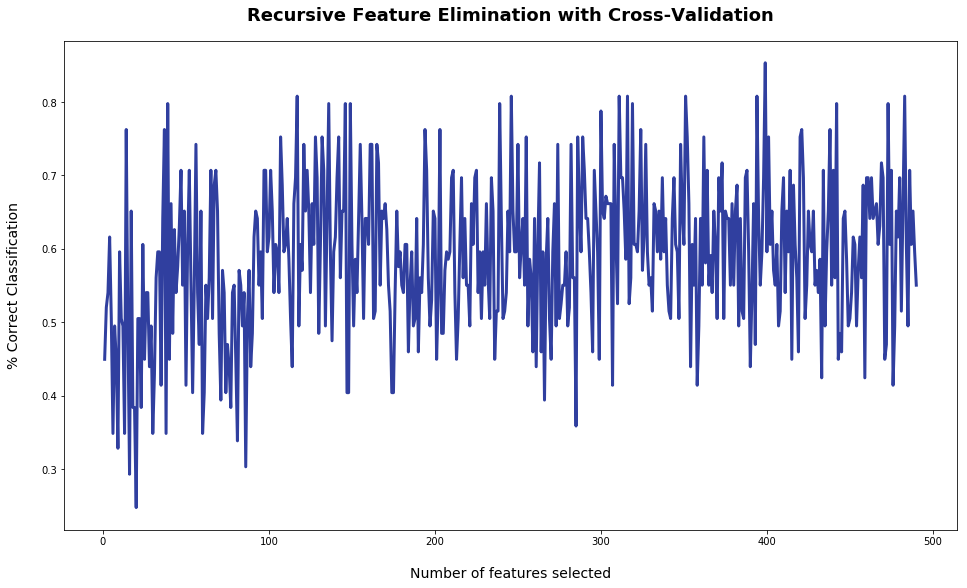

In [73]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

###### Dropping least important descriptors

In [74]:
print(np.where(rfecv.support_ == False)[0])

train.drop(train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
test.drop(test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79 261 263 269 272 274 283 284 285 286 287
 288]


In [ ]:
train

##### Descriptors' relevance

In [ ]:
dset = pd.DataFrame()
dset['attr'] = train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()



In [ ]:
dset

In [ ]:
plt.figure(figsize=(16, 14))
plt.barh(y=dset.iloc[0:50,0], width=dset.iloc[0:50,1], color='#1976D2')
plt.title('RFECV - 50 Most Important Features', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
dset.iloc[[0:343],0]

### Support Vector Machine (SVM) 

#### Grid search cross-validation and SVM classificator

In [75]:
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svc = SVC()
clf = GridSearchCV(svc, param_grid = parameters)

In [76]:
clf.fit(train, ic50_train_enc)

/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'sigmoid', 'rbf', 'poly'], 'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]), 'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
ypred = clf.predict(test)

In [78]:
print("Accuracy: {}".format(metrics.accuracy_score(ic50_test_enc, ypred)))

Accuracy: 0.857142857143


In [79]:
clf.fit(train_sc, ic50_train_enc)
ypred = clf.predict(test_sc)
print("Accuracy: {} - standard".format(metrics.accuracy_score(ic50_test_enc, ypred)))
      
clf.fit(train_mmsc, ic50_train_enc)
ypred = clf.predict(test_mmsc)
print("Accuracy: {} - MinMax".format(metrics.accuracy_score(ic50_test_enc, ypred)))

clf.fit(train_masc, ic50_train_enc)
ypred = clf.predict(test_masc)
print("Accuracy: {} - MaxAbs".format(metrics.accuracy_score(ic50_test_enc, ypred)))

clf.fit(train_rsc, ic50_train_enc)
ypred = clf.predict(test_rsc)
print("Accuracy: {} - Robust".format(metrics.accuracy_score(ic50_test_enc, ypred)))

clf.fit(train_gsc, ic50_train_enc)
ypred = clf.predict(test_gsc)
print("Accuracy: {} - Gaussian".format(metrics.accuracy_score(ic50_test_enc, ypred)))

clf.fit(train_usc, ic50_train_enc)
ypred = clf.predict(test_usc)
print("Accuracy: {} - Uniform".format(metrics.accuracy_score(ic50_test_enc, ypred)))

clf.fit(train_nsc, ic50_train_enc)
ypred = clf.predict(test_nsc)
print("Accuracy: {} - Normalized".format(metrics.accuracy_score(ic50_test_enc, ypred)))


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.428571428571 - standard


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.428571428571 - MinMax


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.571428571429 - MaxAbs


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.428571428571 - Robust


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.285714285714 - Gaussian


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.714285714286 - Uniform
Accuracy: 0.714285714286 - Normalized


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Grid search cross-validation and SVM regressor

In [80]:
from sklearn.svm import SVR
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svr = SVR()
clf = GridSearchCV(svr, param_grid = parameters)

In [81]:
clf.fit(train, ic50_train)

/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'sigmoid', 'rbf', 'poly'], 'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]), 'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
ypred=clf.predict(test)

In [83]:
metrics.r2_score(ic50_test, ypred)

-0.937146798329956

In [84]:
clf.fit(train_sc, ic50_train)
ypred = clf.predict(test_sc)
print("R²: {} - standard".format(metrics.r2_score(ic50_test, ypred)))
      
clf.fit(train_mmsc, ic50_train)
ypred = clf.predict(test_mmsc)
print("R²: {} - MinMax".format(metrics.r2_score(ic50_test, ypred)))

clf.fit(train_masc, ic50_train)
ypred = clf.predict(test_masc)
print("R²: {} - MaxAbs".format(metrics.r2_score(ic50_test, ypred)))

clf.fit(train_rsc, ic50_train)
ypred = clf.predict(test_rsc)
print("R²: {} - Robust".format(metrics.r2_score(ic50_test, ypred)))

clf.fit(train_gsc, ic50_train)
ypred = clf.predict(test_gsc)
print("R²: {} - Gaussian".format(metrics.r2_score(ic50_test, ypred)))

clf.fit(train_usc, ic50_train)
ypred = clf.predict(test_usc)
print("R²: {} - Uniform".format(metrics.r2_score(ic50_test, ypred)))

clf.fit(train_nsc, ic50_train)
ypred = clf.predict(test_nsc)
print("R²: {} - Normalized".format(metrics.r2_score(ic50_test, ypred)))

/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.405271085645 - standard


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.548185057384 - MinMax


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.46574209468 - MaxAbs


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.500748715114 - Robust


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.609259073308 - Gaussian


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R²: -0.337552790616 - Uniform
R²: -0.285858636524 - Normalized


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
clf.fit(train_rsc, ic50_train)
ypred = clf.predict(test_rsc)
print("R²: {} - Robust".format(metrics.r2_score(ic50_test, ypred)))

In [ ]:
X_grid = np.arange(min(train_rsc), max(train_rsc), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(train_rsc, test_rsc, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Neural networks

#### Multi-Layer Perceptor Classifier (MLPC)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [ ]:
mlp.fit(train,ic50_train_enc)

In [ ]:
predictions = mlp.predict(test)

In [ ]:
print(confusion_matrix(ic50_test_enc,predictions))
print(classification_report(ic50_test_enc,predictions))

In [ ]:
mlp.fit(train_sc,ic50_train_enc)
predictions = mlp.predict(test_sc)
print("Standard")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_mmsc,ic50_train_enc)
predictions = mlp.predict(test_mmsc)
print("----------------------------------------------")
print("MinMax")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_masc,ic50_train_enc)
predictions = mlp.predict(test_masc)
print("----------------------------------------------")
print("MaxAbs")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_rsc,ic50_train_enc)
predictions = mlp.predict(test_rsc)
print("----------------------------------------------")
print("Robust")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_gsc,ic50_train_enc)
predictions = mlp.predict(test_gsc)
print("----------------------------------------------")
print("Gaussian")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_usc,ic50_train_enc)
predictions = mlp.predict(test_usc)
print("----------------------------------------------")
print("Uniform")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_nsc,ic50_train_enc)
predictions = mlp.predict(test_nsc)
print("----------------------------------------------")
print("Normalized")
print(classification_report(ic50_test_enc,predictions))

### Gradient Boosting Classifier

#### Learning rates

A learning rate that maximizes accuracy in both training and test sets.

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_sc, ic50_train_enc)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_sc, ic50_train_enc)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(test_sc, ic50_test_enc)))
    print()

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train_mmsc, ic50_train_enc)
predictions = gb_clf2.predict(test_mmsc)

print("Confusion Matrix:")
print(confusion_matrix(ic50_test_enc, predictions))

print("Classification Report")
print(classification_report(ic50_test_enc, predictions))

#### XGBoost Classifier

In [85]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [86]:
xgb_clf = XGBClassifier()

In [87]:
xgb_clf.fit(train_mmsc, ic50_train_enc)
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
y_pred = xgb_clf.predict(test_mmsc)
predictions = [round(value) for value in y_pred]

In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ic50_test_enc, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.14%


## All ligands

In [8]:
non_applying_descriptors = []
num_descriptors = len(all_ligands.columns)

for i in range(1, num_descriptors):
    if (str(all_ligands.dtypes[i]) != 'float64') and (str(all_ligands.dtypes[i]) != 'int64') and (str(all_ligands.dtypes[i]) != 'bool'):
        non_applying_descriptors.append(all_ligands.columns[i])
        

In [9]:
for descriptor in non_applying_descriptors:
    all_ligands.drop(columns=[descriptor], inplace=True)

In [10]:
all_ligands.head(64)

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,39_SD-027,16.401355,12.830851,0,0,27.538947,2.351515,4.658626,27.538947,1.311378,...,9.782844,72.950827,281.116427,7.808790,1085,28,108,124,5.916667,4.638889
1,24_SD-012,23.120752,17.496509,0,0,36.792136,2.500037,4.883480,36.792136,1.268694,...,10.341904,79.079406,418.142324,8.198869,2404,45,158,185,9.562500,6.097222
2,102_wo17590_77,20.413286,16.725919,0,0,34.468616,2.492661,4.888530,34.468616,1.325716,...,10.230955,80.593694,352.164774,7.655756,1672,41,140,168,7.500000,5.805556
3,1_BMS986165_PKD_TYK2_prw_nowater_nimbus01,25.569882,20.595148,0,2,41.680715,2.508615,4.935337,41.680715,1.302522,...,10.515777,88.755240,437.192386,7.948952,2867,53,178,216,9.944444,6.888889
4,60_wo14660_81,21.489002,17.014394,0,0,35.859929,2.400952,4.801904,35.859929,1.280712,...,10.136621,63.084823,378.144038,8.220523,2107,43,142,164,9.500000,6.277778
5,30_SD-018,21.339172,16.591226,0,0,35.567428,2.472600,4.869993,35.567428,1.317312,...,10.213579,76.236824,363.124386,8.856692,1900,42,144,170,7.750000,5.888889
6,71_wo14670_11,22.432916,17.827128,0,0,36.451821,2.420100,4.840201,36.451821,1.256959,...,10.253546,64.475941,415.111439,8.832158,2292,45,150,173,10.451389,6.333333
7,95_wo15310_41,26.139090,20.772484,0,0,44.291265,2.443295,4.863012,44.291265,1.302684,...,10.392834,89.570321,459.201888,7.783083,3628,53,176,208,10.722222,7.750000
8,8_BMS986165_PKD_TYK2_prw_nowaternimbus08,27.800593,21.595361,0,2,45.261588,2.507478,4.937619,45.261588,1.293188,...,10.576662,87.807318,478.198948,8.244809,3729,59,192,231,11.305556,7.555556
9,75_wo14670_1,20.978262,17.570194,0,0,33.944013,2.425675,4.843985,33.944013,1.257186,...,10.236346,80.454852,389.115775,8.459039,1819,42,142,166,9.951389,5.861111


In [11]:
all_ligands.sort_values(by=['Ligand'], inplace=True)
all_ligands.reset_index(drop=True, inplace=True)
all_ligands.head(64)

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,100_wo17590_27,21.120393,17.395811,0,0,35.044844,2.490618,4.890757,35.044844,1.297957,...,10.293196,76.495281,367.175673,7.649493,1874,42,144,172,7.750000,6.055556
1,101_wo17590_2,20.672506,16.728469,0,0,33.426006,2.491886,4.885283,33.426006,1.285616,...,10.242777,80.655048,354.160437,7.870232,1687,40,142,169,8.111111,5.611111
2,102_wo17590_77,20.413286,16.725919,0,0,34.468616,2.492661,4.888530,34.468616,1.325716,...,10.230955,80.593694,352.164774,7.655756,1672,41,140,168,7.500000,5.805556
3,103_wo17590_84,22.494166,17.412162,0,0,37.746202,2.495751,4.915320,37.746202,1.348079,...,10.391607,83.229942,380.159689,7.919994,2035,46,156,189,7.111111,6.083333
4,104_wo17590_85,23.241713,18.356884,0,0,38.878496,2.492046,4.885544,38.878496,1.340638,...,10.338414,84.830777,389.171256,8.107735,2337,44,160,192,7.361111,6.305556
5,105_wo17590_88,24.017769,19.082824,0,0,39.894904,2.492434,4.887571,39.894904,1.329830,...,10.396933,86.148121,406.186572,7.811280,2561,47,166,200,8.222222,6.500000
6,106_wo17590_89,26.485286,20.586688,0,0,42.676460,2.492619,4.886618,42.676460,1.293226,...,10.522046,89.726821,457.158641,8.963895,3425,52,184,220,10.284722,6.972222
7,107_wo17590_91,24.017769,19.082824,0,0,39.894904,2.492434,4.887571,39.894904,1.329830,...,10.396933,86.148121,405.166171,8.268697,2561,47,166,200,8.222222,6.500000
8,10_BMS986165_PKD_TYK2_prw_nowater_nimbus10,27.024536,20.894750,0,2,44.354454,2.506928,4.935683,44.354454,1.304543,...,10.525595,86.611577,461.203619,8.091292,3447,56,186,223,10.444444,7.361111
9,12_LAS203756,24.793826,18.444754,0,0,41.003700,2.499482,4.946810,41.003700,1.322700,...,10.454812,81.186093,423.150681,8.463014,2776,52,170,204,8.472222,6.694444


In [12]:
pic50_all_ligands = pd.read_excel('/home/alexis/Desktop/PeleAI_data/y_data_all_lignads.xlsx')
pic50_all_ligands.index

RangeIndex(start=0, stop=64, step=1)

In [13]:
pic50_all_ligands.head(64)

,Ligand,IC50
0,100_wo17590_27,-8.569
1,101_wo17590_2,-8.489
2,102_wo17590_77,-8.396
3,103_wo17590_84,-8.213
4,104_wo17590_85,-8.031
5,105_wo17590_88,-8.079
6,106_wo17590_89,-8.000
7,107_wo17590_91,-6.699
8,10_BMS986165_PKD_TYK2_prw_nowater_nimbus10,-7.301
9,12_LAS203756,-4.824


In [14]:
correlated_features = set()
correlation_matrix = all_ligands.drop('Ligand', axis=1).corr()

In [15]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8 and (correlation_matrix.columns[j] not in correlated_features):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

set(['MATS3v', 'Xch-7dv', 'n12FaRing', 'MATS3s', 'MATS3p', 'SpAD_Dzare', 'LabuteASA', 'MATS3d', 'Xch-3dv', 'MATS3c', 'AATS6Z', 'MATS4Z', 'MATS3m', 'TMWC10', 'MATS3i', 'AATS6m', 'LogEE_Dzpe', 'SdsN', 'MATS4d', 'AATS6d', 'MATS4i', 'SpMAD_D', 'MATS3Z', 'nFHRing', 'MATS4m', 'MATS4s', 'MATS4p', 'MATS4v', 'AXp-6d', 'AATS6v', 'AATS6p', 'AATS6s', 'ATS7Z', 'AATS4pe', 'Xp-5d', 'AETA_eta_R', 'TIC1', 'FPSA5', 'AATSC7i', 'FPSA3', 'SM1_Dzv', 'FPSA1', 'nBondsS', 'AATS7se', 'MATS6are', 'SsssN', 'nAtom', 'SpAbs_Dzpe', 'AETA_eta_L', 'AATSC6pe', 'ATS5se', 'MATS3pe', 'RASA', 'ATS7s', 'ATS7p', 'ATS7v', 'n5AHRing', 'VE2_D', 'JGT10', 'WNSA2', 'WNSA4', 'VR3_Dzpe', 'ATS7m', 'Xpc-6d', 'BIC1', 'Spe', 'ATS7d', 'VE2_Dzse', 'VR3_Dzare', 'SsCH3', 'Mor01se', 'Vabc', 'SpDiam_DzZ', 'ATS0pe', 'SaaNH', 'BCUTm-1l', 'BCUTm-1h', 'LogEE_A', 'LogEE_D', 'SpDiam_Dzv', 'SpDiam_Dzp', 'MATS1se', 'GATS5se', 'BIC4', 'AETA_beta_ns_d', 'SpDiam_Dzm', 'StsC', 'SpDiam_Dzi', 'MATS4c', 'MATS5dv', 'ETA_eta_RL', 'ATSC0Z', 'Xpc-6dv', 'Mm', 'A

In [16]:
print("Correlated descriptors computed: {}".format(len(correlated_features)))
print("Number of descriptors before discard: {}".format(len(dummy_df.columns)))
dummy_df = dummy_df.drop(correlated_features, axis=1)
print("Number of descriptors after discard: {}".format(len(dummy_df.columns)))

Correlated descriptors computed: 987
Number of descriptors before discard: 1827
Number of descriptors after discard: 840


In [17]:
all_ligands = all_ligands.merge(pic50_all_ligands, how='left')

In [18]:
train, test = train_test_split(all_ligands, test_size=0.24, random_state=17)

In [19]:
test

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,IC50
26,28_SD-016,22.155669,17.063825,0,0,36.356972,2.472679,4.870604,36.356972,1.298463,...,77.455606,381.114964,9.295487,2128,44,150,177,8.611111,6.055556,-5.312
56,92_wo15310_31,24.127159,19.656043,0,0,40.321270,2.440580,4.860107,40.321270,1.300686,...,86.274592,421.186238,7.799745,2712,49,164,195,9.972222,6.916667,-8.419
9,12_LAS203756,24.793826,18.444754,0,0,41.003700,2.499482,4.946810,41.003700,1.322700,...,81.186093,423.150681,8.463014,2776,52,170,204,8.472222,6.694444,-4.824
58,94_wo15310_38,24.684436,20.438028,0,0,41.785463,2.451696,4.877981,41.785463,1.305796,...,87.436588,434.206639,7.486321,2935,52,168,201,10.222222,7.277778,-6.796
51,86_wo15143_35,23.977329,19.261834,0,0,39.982817,2.495270,4.906544,39.982817,1.332761,...,86.101591,421.132094,8.594533,2505,48,166,201,8.222222,6.527778,-8.301
23,25_SD-013,19.815569,16.307727,0,0,32.909952,2.478858,4.880017,32.909952,1.316398,...,79.550518,338.137890,7.863672,1477,39,136,163,7.250000,5.472222,-6.456
62,98_wo15310_46,24.834266,19.489601,0,0,41.600683,2.434408,4.865159,41.600683,1.300021,...,86.443362,436.165917,8.229546,2984,52,168,199,10.222222,7.166667,-8.338
16,19_SD-006,20.046279,15.451754,0,0,33.468199,2.366458,4.717857,33.468199,1.287238,...,74.088365,352.176007,7.656000,1954,36,132,151,8.388889,5.805556,-8.194
42,69_wo14661_76,24.765316,19.507843,0,0,41.863032,2.438452,4.859251,41.863032,1.308220,...,81.460709,431.181821,8.135506,2980,50,166,195,9.611111,7.222222,-8.210
21,23_SD-011,21.679272,16.497091,0,0,35.105369,2.366948,4.718364,35.105369,1.253763,...,76.413702,381.191323,7.474340,2450,38,142,161,9.500000,6.138889,-7.854


In [20]:
train

,Ligand,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,IC50
54,90_wo15310_29,23.310663,19.143590,0,0,39.328254,2.434628,4.853713,39.328254,1.310942,...,84.955797,407.170588,7.983737,2470,47,158,188,9.111111,6.750000,-8.263
33,35_SD-023,22.931725,18.726506,0,0,36.984710,2.433999,4.839176,36.984710,1.275335,...,84.032246,450.012030,10.714572,2248,45,156,185,9.472222,6.250000,-6.886
29,31_SD-019,23.128092,19.154213,0,0,36.700748,2.485026,4.911307,36.700748,1.265543,...,84.463671,415.131425,8.302629,2189,47,160,191,10.173611,6.083333,-7.886
14,17_SD-002,20.810405,17.428974,0,0,33.953149,2.411799,4.814987,33.953149,1.257524,...,80.526405,391.084745,9.311542,1875,43,140,165,9.861111,6.000000,-8.337
61,97_wo15310_45,24.127159,19.656043,0,0,40.321270,2.440580,4.860107,40.321270,1.300686,...,86.274592,437.152161,8.095410,2712,49,164,195,9.972222,6.916667,-8.255
11,14_LAS203900,24.017769,17.838004,0,1,39.902350,2.489954,4.913111,39.902350,1.330078,...,79.976698,406.160518,8.123210,2558,49,164,196,7.611111,6.500000,-7.284
37,39_SD-027,16.401355,12.830851,0,0,27.538947,2.351515,4.658626,27.538947,1.311378,...,72.950827,281.116427,7.808790,1085,28,108,124,5.916667,4.638889,-4.824
28,30_SD-018,21.339172,16.591226,0,0,35.567428,2.472600,4.869993,35.567428,1.317312,...,76.236824,363.124386,8.856692,1900,42,144,170,7.750000,5.888889,-6.000
8,10_BMS986165_PKD_TYK2_prw_nowater_nimbus10,27.024536,20.894750,0,2,44.354454,2.506928,4.935683,44.354454,1.304543,...,86.611577,461.203619,8.091292,3447,56,186,223,10.444444,7.361111,-7.301
25,27_SD-015,27.512863,21.009434,0,0,46.783323,2.492887,4.947722,46.783323,1.336666,...,85.660541,477.192466,8.088008,3639,59,188,225,10.083333,7.777778,-6.509


In [21]:
ic50_train_all_ligand = train['IC50']
ic50_test_all_ligand = test['IC50']

In [22]:
train.fillna(value=0.0, inplace=True)
test.fillna(value=0.0, inplace=True)

In [23]:
ic50_train_enc_all_ligand = [1 if ic50 > -7 else 0 for ic50 in ic50_train_all_ligand.values]
ic50_test_enc_all_ligand = [1 if ic50 > -7 else 0 for ic50 in ic50_test_all_ligand.values]

In [24]:
train.drop(['Ligand','IC50'], axis=1, inplace=True)
test.drop(['Ligand','IC50'], axis=1, inplace=True)

##### Standard

In [25]:
scaler = StandardScaler()

In [26]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [27]:
train_sc = scaler_train.fit_transform(train)
test_sc = scaler_train.fit_transform(test)

##### MinMax

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [30]:
train_mmsc = scaler_train.fit_transform(train)
test_mmsc = scaler_train.fit_transform(test)

##### MaxAbs

In [31]:
scaler = MaxAbsScaler()

In [32]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [33]:
train_masc = scaler_train.fit_transform(train)
test_masc = scaler_train.fit_transform(test)

##### Robust 

In [34]:
scaler = RobustScaler()

In [35]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [36]:
train_rsc = scaler_train.fit_transform(train)
test_rsc = scaler_train.fit_transform(test)

##### Power Transformer - Yeo-Johnson

In [37]:
scaler = PowerTransformer(method='yeo-johnson')

In [38]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [39]:
train_yjsc = scaler_train.fit_transform(train)
test_yjsc = scaler_train.fit_transform(test)

##### Quantile transformer - Gaussian

In [40]:
scaler = QuantileTransformer(output_distribution='normal')

In [41]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [42]:
train_gsc = scaler_train.fit_transform(train)
test_gsc = scaler_train.fit_transform(test)

##### Quantile transformer - Uniform

In [43]:
scaler = QuantileTransformer(output_distribution='uniform')

In [44]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [45]:
train_usc = scaler_train.fit_transform(train)
test_usc = scaler_train.fit_transform(test)

##### Normalizer

In [46]:
scaler = Normalizer()

In [47]:
scaler_train = scaler.fit(train, ic50_train_all_ligand)

In [48]:
train_nsc = scaler_train.fit_transform(train)
test_nsc = scaler_train.fit_transform(test)

## Feature selection

#### Pearson correlation

In [295]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()

    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    return cor_support, cor_feature 

In [296]:
cor_support, cor_feature = cor_selector(train, ic50_train_enc_all_ligand, len(train.columns))
print(str(len(cor_feature)), 'selected features')

('1502', 'selected features')


#### LASSO

In [49]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=len(train.columns))
embeded_lr_selector.fit(train_mmsc, ic50_train_enc_all_ligand)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

('545', 'selected features')


In [298]:
#train_lasso = train.drop(train.columns[np.where(embeded_lr_support == False)[0]], axis=1)
#test_lasso = test.drop(test.columns[np.where(embeded_lr_support == False)[0]], axis=1)

#### Chi-squared

In [299]:
chi_selector = SelectKBest(chi2, k=400)
chi_selector.fit(train_mmsc, ic50_train_enc_all_ligand)

SelectKBest(k=400, score_func=<function chi2 at 0x7f090ae1f450>)

In [300]:
chi_support = chi_selector.get_support()
chi_feature = train.loc[:,chi_support].columns.tolist()

In [301]:
print(str(len(chi_feature)), 'selected features')

('400', 'selected features')


#### Light Gradient Boosting Classifier

In [50]:
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

In [51]:
embeded_lgb_selector = SelectFromModel(lgbc, max_features=len(train.columns))
embeded_lgb_selector.fit(train_mmsc, ic50_train_enc_all_ligand)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=40, min_split_gain=0.01,
        n_estimators=500, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        max_features=1502, norm_order=1, prefit=False, threshold=None)

In [52]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = train.loc[:,embeded_lgb_support].columns.tolist()

In [53]:
print(str(len(embeded_lgb_feature)), 'selected features')

('1502', 'selected features')


### Recursive feature elimination (RFE)

#### By Support Vector Classifier (SVC)

- Error report:

        * n_splits=2 cannot be greater than the number of members in each class.
        * The classifier does not expose "coef_" or "feature_importances_" attributes
        
Dependence on train/test split

In [54]:
svc = LinearSVC()
rfe = RFE(svc)
rfe.fit(train, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - '.format(rfe.n_features_))
rfe.fit(train_sc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - Standard'.format(rfe.n_features_))
rfe.fit(train_mmsc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - MinMax'.format(rfe.n_features_))
rfe.fit(train_masc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - MaxAbs'.format(rfe.n_features_))
rfe.fit(train_rsc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - Robust'.format(rfe.n_features_))
rfe.fit(train_yjsc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - Yeo-Johnson'.format(rfe.n_features_))
rfe.fit(train_gsc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - Gaussian'.format(rfe.n_features_))
rfe.fit(train_usc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - uniform'.format(rfe.n_features_))
rfe.fit(train_nsc, ic50_train_enc_all_ligand)
print('Optimal number of features: {} - normalized'.format(rfe.n_features_))


Optimal number of features: 751 - 
Optimal number of features: 751 - Standard
Optimal number of features: 751 - MinMax
Optimal number of features: 751 - MaxAbs
Optimal number of features: 751 - Robust
Optimal number of features: 751 - Yeo-Johnson
Optimal number of features: 751 - Gaussian
Optimal number of features: 751 - uniform
Optimal number of features: 751 - normalized


In [ ]:
#print(np.where(rfe.support_ == False)[0])

#train.drop(train.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)
#test.drop(test.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)

#### By Ensemble, Random Forest (RF) and Extremely Randomized Trees (Extra Trees Classifier)

##### Ensemble

In [307]:
stump = DecisionTreeClassifier(max_depth=1)
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [308]:
stump.fit(train, np.ravel(ic50_train_enc_all_ligand))
ensemble.fit(train, np.ravel(ic50_train_enc_all_ligand))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [309]:
y_pred_stump = stump.predict(test)
y_pred_ensemble = ensemble.predict(test)

In [310]:
stump_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_ensemble)

In [311]:
print("The accuracy of the stump is {}%".format(stump_accuracy*100))
print("The accuracy of the ensemble is {}%".format(ensemble_accuracy*100))

The accuracy of the stump is 68.75%
The accuracy of the ensemble is 56.25%


##### Random Forest

In [312]:
tree = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")

random_forest = BaggingClassifier(base_estimator = tree, n_estimators = 1000,bootstrap = True)

In [313]:
tree.fit(train, np.ravel(ic50_train_enc_all_ligand))
random_forest.fit(train, np.ravel(ic50_train_enc_all_ligand))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [314]:
y_pred_tree = tree.predict(test)
y_pred_random_forest = random_forest.predict(test)

In [315]:
tree_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_tree)
random_forest_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_random_forest)

In [316]:
print("The accuracy of the tree is {}%".format(tree_accuracy*100))
print("The accuracy of the Random Forest is {}%".format(random_forest_accuracy*100))

The accuracy of the tree is 56.25%
The accuracy of the Random Forest is 62.5%


##### Extra Trees Classifier

In [317]:
rm_tree = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

extra_trees = BaggingClassifier(base_estimator = stump, n_estimators = 1000, bootstrap = False)

In [318]:
rm_tree.fit(train, np.ravel(ic50_train_enc_all_ligand))
extra_trees.fit(train, np.ravel(ic50_train_enc_all_ligand))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [319]:
y_pred_rm_tree = rm_tree.predict(test)
y_pred_extra_trees = extra_trees.predict(test)

In [320]:
rm_tree_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_rm_tree)
extra_trees_accuracy = metrics.accuracy_score(ic50_test_enc_all_ligand, y_pred_extra_trees)

In [321]:
print("The accuracy of the tree is {}%".format(rm_tree_accuracy*100))
print("The accuracy of the Extra Trees is {}%".format(extra_trees_accuracy*100))

The accuracy of the tree is 62.5%
The accuracy of the Extra Trees is 56.25%


##### Proceeding to RFE-CV with Random Forest Classifier

After several runs ...

In [55]:
rfc = RandomForestClassifier(random_state=101)

In [56]:
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy') #pujar els k-folds

In [57]:
rfecv.fit(train, ic50_train_enc_all_ligand)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [58]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 642


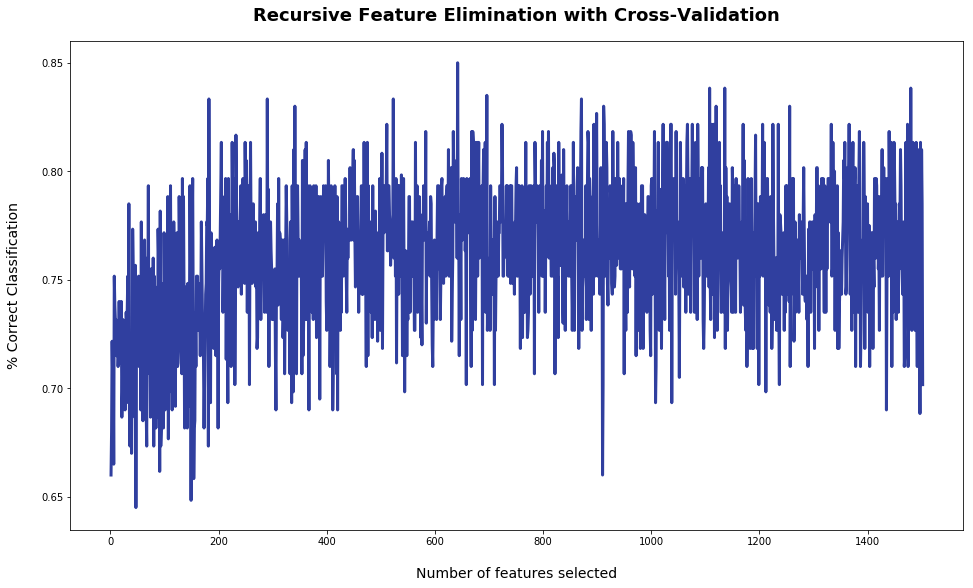

In [59]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

###### Dropping least important descriptors

In [60]:
print(np.where(rfecv.support_ == False)[0])

train.drop(train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
test.drop(test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 

In [61]:
train.columns

Index([u'FNSA4', u'FNSA5', u'FPSA1', u'FPSA2', u'FPSA3', u'FPSA4', u'FPSA5',
       u'WNSA1', u'WNSA2', u'WNSA4',
       ...
       u'SRW08', u'SRW09', u'SRW10', u'TSRW10', u'MW', u'AMW', u'WPath',
       u'WPol', u'Zagreb1', u'Zagreb2'],
      dtype='object', length=642)

##### Descriptors' relevance

In [ ]:
dset = pd.DataFrame()
dset['attr'] = train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()



In [ ]:
dset

In [ ]:
plt.figure(figsize=(16, 14))
plt.barh(y=dset.iloc[0:50,0], width=dset.iloc[0:50,1], color='#1976D2')
plt.title('RFECV - 50 Most Important Features', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
dset.iloc[[0:343],0]

### Support Vector Machine (SVM) 

#### Grid search cross-validation and SVM classificator

In [62]:
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svc = SVC()
clf = GridSearchCV(svc, param_grid = parameters)

In [63]:
clf.fit(train, ic50_train_enc_all_ligand)

/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'sigmoid', 'rbf', 'poly'], 'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]), 'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
ypred = clf.predict(test)

In [65]:
print("Accuracy: {}".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

Accuracy: 0.625


In [66]:
clf.fit(train_sc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_sc)
print("Accuracy: {} - standard".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))
      
clf.fit(train_mmsc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_mmsc)
print("Accuracy: {} - MinMax".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

clf.fit(train_masc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_masc)
print("Accuracy: {} - MaxAbs".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

clf.fit(train_rsc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_rsc)
print("Accuracy: {} - Robust".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

clf.fit(train_gsc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_gsc)
print("Accuracy: {} - Gaussian".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

clf.fit(train_usc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_usc)
print("Accuracy: {} - Uniform".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))

clf.fit(train_nsc, ic50_train_enc_all_ligand)
ypred = clf.predict(test_nsc)
print("Accuracy: {} - Normalized".format(metrics.accuracy_score(ic50_test_enc_all_ligand, ypred)))


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.6875 - standard


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.625 - MinMax


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.6875 - MaxAbs


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.8125 - Robust


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.8125 - Gaussian


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.75 - Uniform
Accuracy: 0.625 - Normalized


/home/alexis/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Grid search cross-validation and SVM regressor

In [67]:
from sklearn.svm import SVR
C_range = np.arange(0.01, 100, step=5)
gamma_range = np.arange(0.1, 10, step=2)
kernels = ["linear","sigmoid","rbf","poly"]
parameters = dict(gamma=gamma_range, C=C_range, kernel=kernels)

svr = SVR()
clf = GridSearchCV(svr, param_grid = parameters)

In [68]:
clf.fit(train, ic50_train_all_ligand)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'sigmoid', 'rbf', 'poly'], 'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]), 'gamma': array([0.1, 2.1, 4.1, 6.1, 8.1])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
ypred=clf.predict(test)

In [70]:
metrics.r2_score(ic50_test_all_ligand, ypred)

-7.174811662258307e-05

In [71]:
clf.fit(train_sc, ic50_train_all_ligand)
ypred = clf.predict(test_sc)
print("R²: {} - standard".format(metrics.r2_score(ic50_test_all_ligand, ypred)))
      
clf.fit(train_mmsc, ic50_train_all_ligand)
ypred = clf.predict(test_mmsc)
print("R²: {} - MinMax".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

clf.fit(train_masc, ic50_train_all_ligand)
ypred = clf.predict(test_masc)
print("R²: {} - MaxAbs".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

clf.fit(train_rsc, ic50_train_all_ligand)
ypred = clf.predict(test_rsc)
print("R²: {} - Robust".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

clf.fit(train_gsc, ic50_train_all_ligand)
ypred = clf.predict(test_gsc)
print("R²: {} - Gaussian".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

clf.fit(train_usc, ic50_train_all_ligand)
ypred = clf.predict(test_usc)
print("R²: {} - Uniform".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

clf.fit(train_nsc, ic50_train_all_ligand)
ypred = clf.predict(test_nsc)
print("R²: {} - Normalized".format(metrics.r2_score(ic50_test_all_ligand, ypred)))

R²: 0.0659123146243 - standard
R²: 0.172204688124 - MinMax
R²: 0.231026281757 - MaxAbs
R²: -11.3048349968 - Robust
R²: 0.308171691128 - Gaussian
R²: 0.270235928613 - Uniform
R²: 0.12409313289 - Normalized


In [ ]:
clf.fit(train_rsc, ic50_train)
ypred = clf.predict(test_rsc)
print("R²: {} - Robust".format(metrics.r2_score(ic50_test, ypred)))

In [ ]:
X_grid = np.arange(min(train_rsc), max(train_rsc), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(train_rsc, test_rsc, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Neural networks

#### Multi-Layer Perceptor Classifier (MLPC)

In [72]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [73]:
mlp.fit(train,ic50_train_enc_all_ligand)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [74]:
predictions = mlp.predict(test)

In [75]:
print(confusion_matrix(ic50_test_enc_all_ligand,predictions))
print(classification_report(ic50_test_enc_all_ligand,predictions))

[[10  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

   micro avg       0.62      0.62      0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



In [76]:
mlp.fit(train_sc,ic50_train_enc)
predictions = mlp.predict(test_sc)
print("Standard")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_mmsc,ic50_train_enc)
predictions = mlp.predict(test_mmsc)
print("----------------------------------------------")
print("MinMax")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_masc,ic50_train_enc)
predictions = mlp.predict(test_masc)
print("----------------------------------------------")
print("MaxAbs")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_rsc,ic50_train_enc)
predictions = mlp.predict(test_rsc)
print("----------------------------------------------")
print("Robust")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_gsc,ic50_train_enc)
predictions = mlp.predict(test_gsc)
print("----------------------------------------------")
print("Gaussian")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_usc,ic50_train_enc)
predictions = mlp.predict(test_usc)
print("----------------------------------------------")
print("Uniform")
print(classification_report(ic50_test_enc,predictions))

mlp.fit(train_nsc,ic50_train_enc)
predictions = mlp.predict(test_nsc)
print("----------------------------------------------")
print("Normalized")
print(classification_report(ic50_test_enc,predictions))

NameError: name 'ic50_train_enc' is not defined

### Gradient Boosting Classifier

#### Learning rates

A learning rate that maximizes accuracy in both training and test sets.

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_sc, ic50_train_enc_all_ligand)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_sc, ic50_train_enc_all_ligand)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(test_sc, ic50_test_enc_all_ligand)))
    print()

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train_mmsc, ic50_train_enc_all_ligand)
predictions = gb_clf2.predict(test_mmsc)

print("Confusion Matrix:")
print(confusion_matrix(ic50_test_enc_all_ligand, predictions))

print("Classification Report")
print(classification_report(ic50_test_enc_all_ligand, predictions))

#### XGBoost Classifier

In [77]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [78]:
xgb_clf = XGBClassifier()

In [79]:
xgb_clf.fit(train_mmsc, ic50_train_enc_all_ligand)
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [80]:
y_pred = xgb_clf.predict(test_mmsc)
predictions = [round(value) for value in y_pred]

In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ic50_test_enc_all_ligand, predictions)
print("Accuracy: {}%".format(accuracy * 100.0))

Accuracy: 87.5%
